# 0.0 IMPORTS 

In [50]:
import pandas as pd
# import psycopg2 as pg
import seaborn as sns
import pickle
import scikitplot as skplt
import matplotlib.patches as mpatches

from sklearn import model_selection as ms
from sklearn import ensemble as en
from sklearn import neighbors as nh
from sklearn import linear_model as lm

from matplotlib import pyplot as plt
from IPython.core.display  import HTML
from IPython.display       import Image

from sklearn import preprocessing as pp

### 0.0.1 Helper Functions


In [53]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [15, 8]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    sns.set()
    
    # Central Tendency -  media e mediana - são metricas de tendência central (central tendency)

def descriptive_statistical(x):
    ct1 = pd.DataFrame( x.apply(np.mean)).T
    ct2 = pd.DataFrame( x.apply(np.median)).T
    
    # Dispersion - desvio padrão, variância, range. min, max, skew, curtosis  - são metricas de dispersão
    d1 = pd.DataFrame( x.apply( np.std ) ).T
    d2 = pd.DataFrame( x.apply( min )).T
    d3 = pd.DataFrame( x.apply( max )).T
    d4 = pd.DataFrame( x.apply(lambda x: x.max() -  x.min() ) ).T
    d5 = pd.DataFrame( x.apply(lambda x: x.skew() ) ).T
    d6= pd.DataFrame( x.apply(lambda x: x.kurtosis() ) ).T
                      
    #concatenate
    m = pd.concat([d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
    m.columns = ['attributes','min','max','range','mean','median','std','skew','Kurtosis',]
    
    return m

In [54]:
jupyter_settings()

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


C:\Users\vande\repos\cross_sell\env-cross-sell\lib\site-packages\IPython\core\magics\pylab.py:162: UserWarning: pylab import has clobbered these variables: ['indices', 'std']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


## 0.1 Database Conection

### 0.1.1 Set Credentials

In [4]:
# # Credentials
# host = 'comunidade-ds-postgres.c50pcakiuwi3.us-east-1.rds.amazonaws.com'
# port = 5432
# database = 'comunidadedsdb'
# username = 'member'
# pwd = 'cdspa'

### 0.1.2 Criar conexão - conn 

In [5]:
# conn = pg.connect( user=username,
#                    password=pwd,
#                    host=host,
#                    port=port,
#                    database=database )

NameError: name 'pg' is not defined

###  0.1.3  Criar cursor 
**Cursor é um ponteiro que vai apontar para onde estão meus dados, após isso podemos criar as queries**

In [13]:
# cursor = conn.cursor()

### 0.1.4 Criação/execução das queries
**SEMPRE FECHAR A CONEXÃO APÓS USO DO DATABASE**

In [14]:
# query_tables = """
#     SELECT tablename
#     FROM pg_tables
#     WHERE schemaname = 'pa004'
# """

# cursor.execute(query_tables)

# record = cursor.fetchall()
# print(record)

# cursor.close()
# conn.close()

### 0.1.5 Collect Data using Psycopg2 

In [15]:
# cursor = conn.cursor()

# query_table_users = """
#     SELECT *
#     FROM pa004.users u
#     WHERE u.age > 44
#     LIMIT 10
# """

# cursor.execute(query_table_users)

# record = cursor.fetchall()
# print(record)

# cursor.close()
# conn.close()

### 0.1.6 Collect Data using Pandas 

In [16]:
# conn = pg.connect( user=username,
#                    password=pwd,
#                    host=host,
#                    port=port,
#                    database=database )

NameError: name 'pg' is not defined

In [ ]:
# query_table_users = """
#     SELECT *
#     FROM pa004.users u LEFT JOIN pa004.vehicle v ON ( u.id = v.id)
#                        LEFT JOIN pa004.insurance i ON ( u.id = i.id)
# """

In [ ]:
# df = pd.read_sql(query_table_users,conn)
# df_raw = df.copy()

In [ ]:
# df_raw.to_csv('data/pa004.csv',index=False)

# 1.0 Data Description

In [4]:
#loading csv dataset

df1 = pd.read_csv('data/pa004.csv')
df1=df1.drop(['id.1','id.2'],axis=1)

**Id:** identificador único do cliente.

**Gender:** gênero do cliente.

**Age:** idade do cliente.

**Driving License:** 0, o cliente não tem permissão para dirigir e 1, o cliente tem para dirigir ( CNH – Carteira 
Nacional de Habilitação )

**Region Code:** código da região do cliente.

**Previously Insured:** 0, o cliente não tem seguro de automóvel e 1, o cliente já tem seguro de automóvel.

**Vehicle Age:** idade do veículo.

**Vehicle Damage:** 0, cliente nunca teve seu veículo danificado no passado e 1, cliente já teve seu veículo danificado no passado.

**Anual Premium:** quantidade que o cliente pagou à empresa pelo seguro de saúde anual.

**Policy sales channel:** código anônimo para o canal de contato com o cliente.

**Vintage:** número de dias que o cliente se associou à empresa através da compra do seguro de saúde.

**Response:** 0, o cliente não tem interesse e 1, o cliente tem interesse.

## 1.1 Data dimensions

In [5]:
print(f'Total de colunas {df1.shape[1]}')
print(f'Total de linhas {df1.shape[0]}')

Total de colunas 12
Total de linhas 381109


## 1.1 Data types

In [6]:
df1.dtypes

id                        int64
gender                   object
age                       int64
region_code             float64
policy_sales_channel    float64
driving_license           int64
vehicle_age              object
vehicle_damage           object
previously_insured        int64
annual_premium          float64
vintage                   int64
response                  int64
dtype: object

## 1.2 Check NA

In [7]:
df1.isna().sum()

id                      0
gender                  0
age                     0
region_code             0
policy_sales_channel    0
driving_license         0
vehicle_age             0
vehicle_damage          0
previously_insured      0
annual_premium          0
vintage                 0
response                0
dtype: int64

## 1.3 Descriptive statistical

In [8]:
num_attributes=(df1.select_dtypes(include=['float64', 'int64']))
cat_attributes=(df1.select_dtypes(exclude=['float64', 'int64']))

### 1.3.1 Numerial Attributes

In [9]:
# função criada para calcular
descriptive_statistical(num_attributes)

,attributes,min,max,range,mean,median,std,skew,Kurtosis
0,id,1.0,381109.0,381108.0,190555.000000,190555.0,110016.691870,-8.071174e-18,-1.200000
1,age,20.0,85.0,65.0,38.822584,36.0,15.511591,6.725390e-01,-0.565655
2,region_code,0.0,52.0,52.0,26.388807,28.0,13.229871,-1.152664e-01,-0.867857
3,policy_sales_channel,1.0,163.0,162.0,112.034295,133.0,54.203924,-9.000081e-01,-0.970810
4,driving_license,0.0,1.0,1.0,0.997869,1.0,0.046109,-2.159518e+01,464.354302
5,previously_insured,0.0,1.0,1.0,0.458210,0.0,0.498251,1.677471e-01,-1.971871
6,annual_premium,2630.0,540165.0,537535.0,30564.389581,31669.0,17213.132474,1.766087e+00,34.004569
7,vintage,10.0,299.0,289.0,154.347397,154.0,83.671194,3.029517e-03,-1.200688
8,response,0.0,1.0,1.0,0.122563,0.0,0.327935,2.301906e+00,3.298788


### 1.3.2 Categorical Attributes

In [10]:
cat_attributes.head()


,gender,vehicle_age,vehicle_damage
0,Male,< 1 Year,Yes
1,Female,1-2 Year,No
2,Female,< 1 Year,No
3,Female,< 1 Year,No
4,Male,1-2 Year,Yes


In [11]:
cat_attributes.apply(lambda x: x.unique().shape[0])

gender            2
vehicle_age       3
vehicle_damage    2
dtype: int64

In [12]:
cat_attributes['vehicle_age'].unique()

array(['< 1 Year', '1-2 Year', '> 2 Years'], dtype=object)

# 2.0 Data Engineering

In [13]:
df2 = df1.copy()

In [14]:
#vehicle age

df2['vehicle_age'] = df2['vehicle_age'].apply( lambda x: 'below_1_year' if x ==  '< 1 Year' else 'between_1_2_year' if x == '1-2 Year' else 'above_2_years' )

#vehicle damage
df2['vehicle_damage'] = df2['vehicle_damage'].apply( lambda x: 1 if x ==  'Yes' else 0 )


# 3.0 Data Filtering

**Não existem variáveis a serem filtradas **

# 4.0 EDA

In [15]:
df4 = df2.copy()

In [16]:
df4.columns

Index(['id', 'gender', 'age', 'region_code', 'policy_sales_channel',
       'driving_license', 'vehicle_age', 'vehicle_damage',
       'previously_insured', 'annual_premium', 'vintage', 'response'],
      dtype='object')

## 4.1 Univariate Analysis

<AxesSubplot:xlabel='response', ylabel='age'>

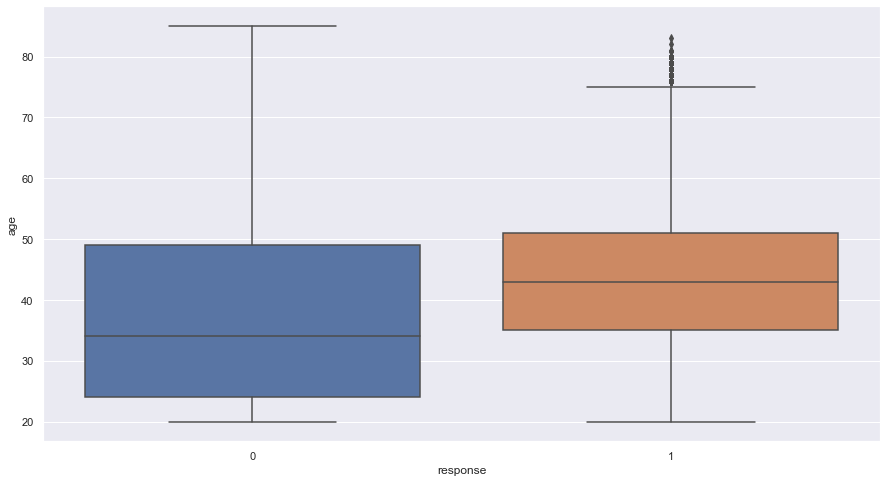

In [17]:
# 'age'
sns.boxplot(x='response', y='age', data=df4)


<AxesSubplot:xlabel='age', ylabel='Count'>

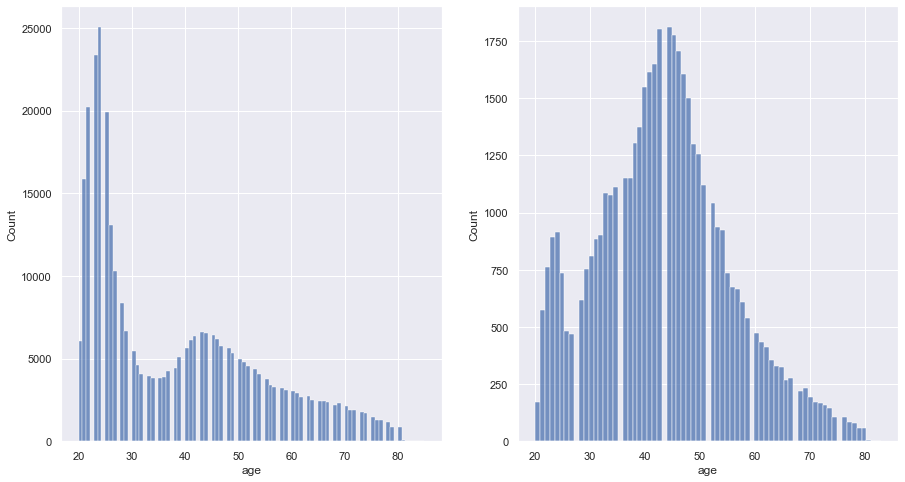

In [18]:
plt.subplot(1,2,1)
aux00 = df4.loc[df4['response'] == 0,'age']
sns.histplot(aux00)


plt.subplot(1,2,2)
aux00 = df4.loc[df4['response'] == 1,'age']
sns.histplot(aux00)

In [19]:
# 'annual_premium'

<AxesSubplot:xlabel='response', ylabel='annual_premium'>

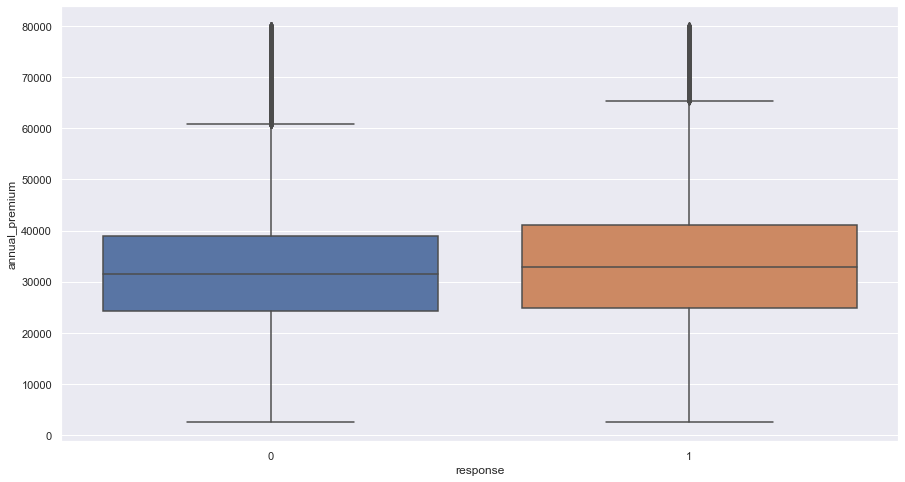

In [20]:
aux= df4[df4['annual_premium'] < 80000]
sns.boxplot(x='response', y='annual_premium', data=aux)


<AxesSubplot:xlabel='annual_premium', ylabel='Count'>

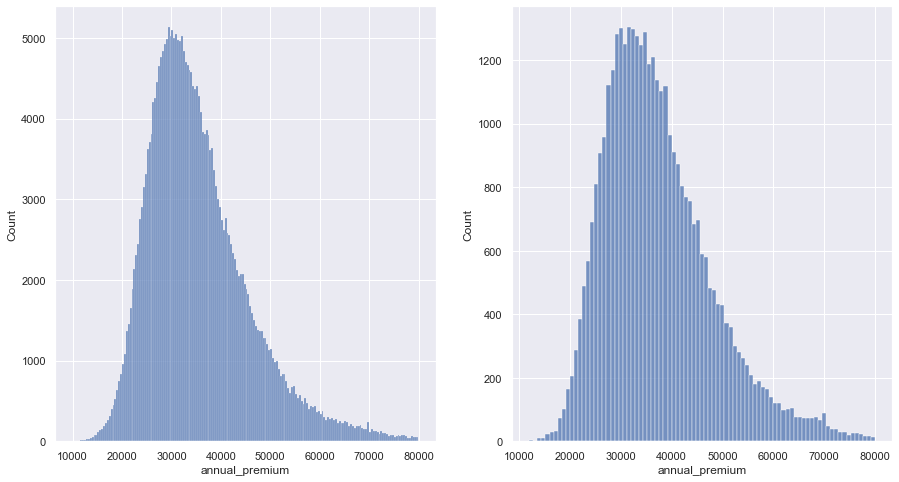

In [21]:
aux= df4[(df4['annual_premium'] < 80000) & (df4['annual_premium'] > 10000)]

plt.subplot(1,2,1)
aux00 = aux.loc[aux['response'] == 0,'annual_premium']
sns.histplot(aux00)


plt.subplot(1,2,2)
aux00 = aux.loc[aux['response'] == 1,'annual_premium']
sns.histplot(aux00)

In [22]:
#  'driving_license'

aux  = df4[['driving_license','response']].groupby('response').sum().reset_index()
aux['driving_license_perc'] = aux['driving_license']/aux['driving_license'].sum()


In [23]:
# 'region_code'

<AxesSubplot:xlabel='region_code', ylabel='id'>

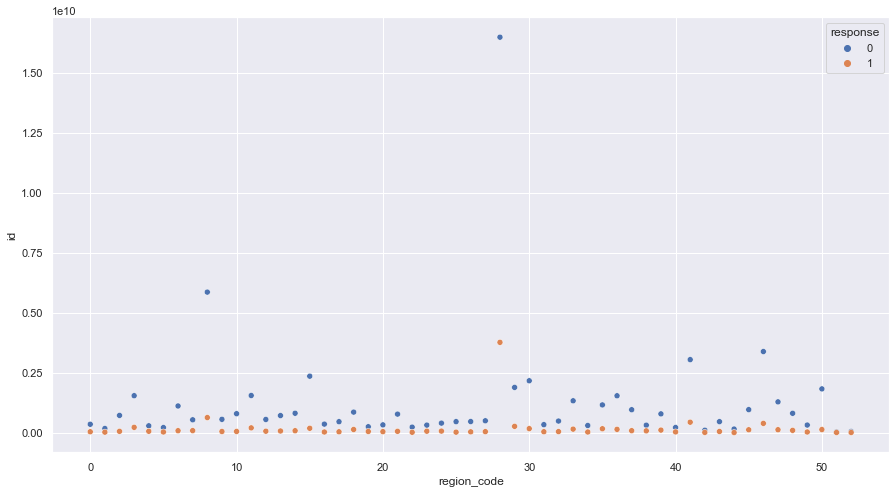

In [24]:
aux0 = df4[['id','region_code','response']].groupby( ['region_code','response'] ).sum().reset_index()
sns.scatterplot(x='region_code', y='id', hue='response', data=aux0)

In [25]:
#  'previously_insured'
pd.crosstab(df4['previously_insured'], df4['response'] ).apply(lambda x: x/x.sum(), axis=1)

response,0,1
previously_insured,,
0,0.774546,0.225454
1,0.999095,0.000905


In [26]:
# 'vehicle_age'

df4[['vehicle_age', 'response']].value_counts(normalize=True).reset_index()

,vehicle_age,response,0
0,between_1_2_year,0,0.434285
1,below_1_year,0,0.413488
2,between_1_2_year,1,0.091328
3,above_2_years,0,0.029663
4,below_1_year,1,0.018897
5,above_2_years,1,0.012338


In [27]:
# 'policy_sales_channel'

aux = df4[['policy_sales_channel','response']].groupby('policy_sales_channel').sum()
aux = df4[df4['response']==1]

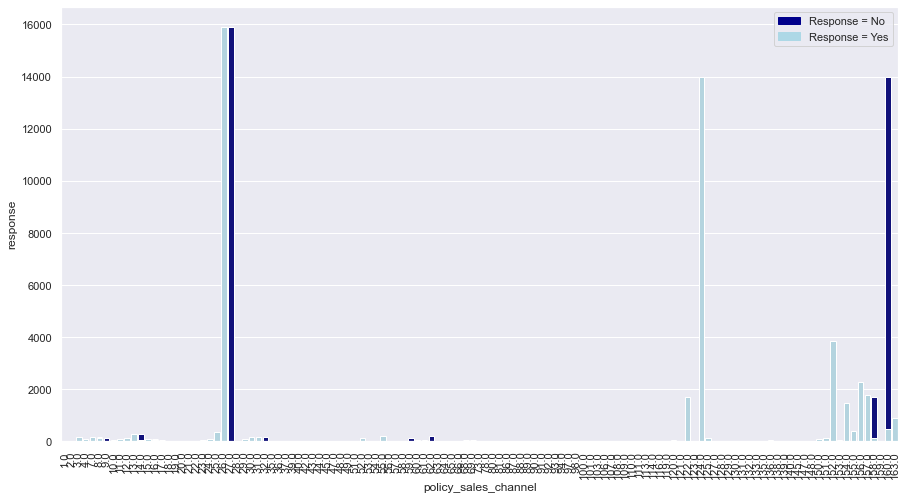

In [28]:
# set plot style: grey grid in the background:
sns.set(style="darkgrid")


# top bar -> sum all values(smoker=No and smoker=Yes) to find y position of the bars
total = df4[['policy_sales_channel','response']].groupby('policy_sales_channel').sum().reset_index()

# bar chart 1 -> top bars (group of 'smoker=No')
bar1 = sns.barplot(x="policy_sales_channel",  y="response", data=total, color='darkblue')

# bottom bar ->  take only smoker=Yes values from the data
response = df4[df4['response']==1]

# bar chart 2 -> bottom bars (group of 'smoker=Yes')
bar2 = sns.barplot(x="policy_sales_channel", y="response", data=response, estimator=sum, ci=None,  color='lightblue')

# add legend
top_bar = mpatches.Patch(color='darkblue', label='Response = No')
bottom_bar = mpatches.Patch(color='lightblue', label='Response = Yes')
plt.legend(handles=[top_bar, bottom_bar])
plt.xticks(rotation=90)


# show the graph
plt.show()

<AxesSubplot:xlabel='response', ylabel='vintage'>

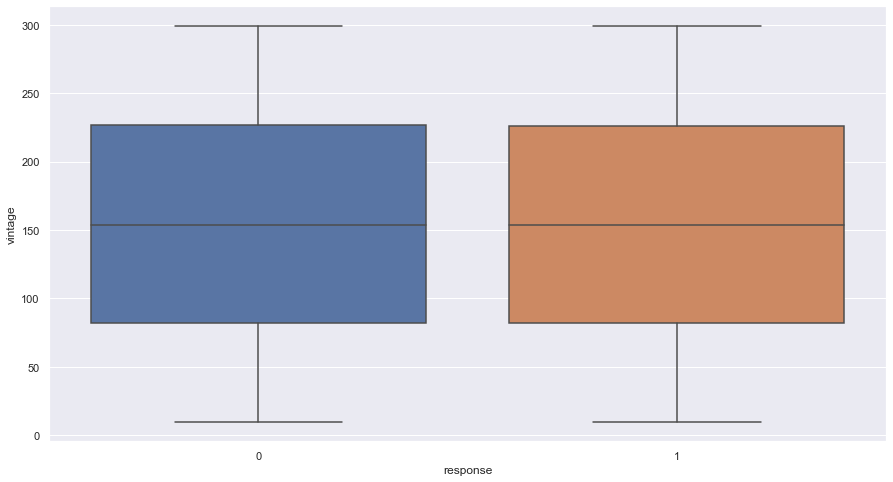

In [29]:
# 'vintage'
sns.boxplot(x='response', y='vintage', data=df4)

<AxesSubplot:xlabel='vintage', ylabel='Count'>

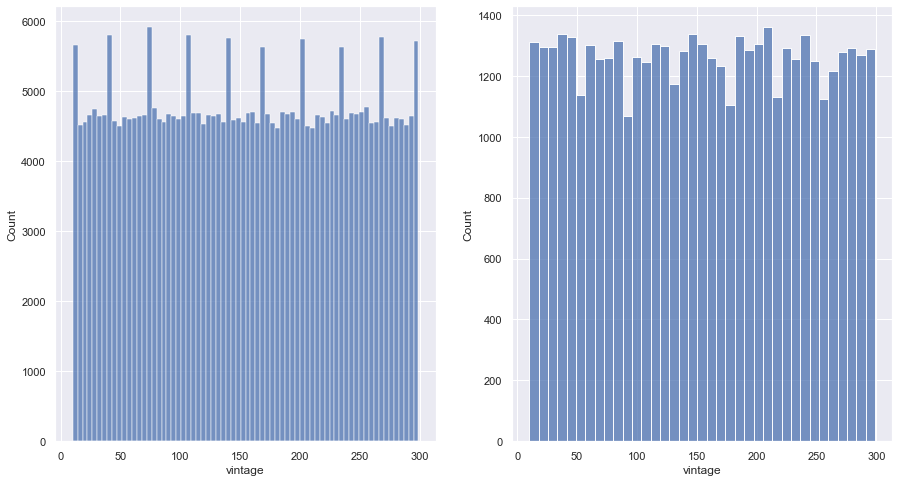

In [30]:

plt.subplot(1,2,1)
aux00 = df4.loc[df4['response'] == 0,'vintage']
sns.histplot(aux00)


plt.subplot(1,2,2)
aux00 = df4.loc[df4['response'] == 1,'vintage']
sns.histplot(aux00)

# 5.0 - DATA PREPARATION


In [63]:
df5= df4.copy()

## Separaçao dadaos train e validation'

In [64]:
X = df4.drop('response', axis=1)
y = df4['response'].copy()

x_train, x_validation, y_train, y_validation = ms.train_test_split( X, y, test_size=0.20 )

df5 = pd.concat([x_train,y_train], axis=1)

## 5.1 Stardardization

In [65]:
ss = pp.StandardScaler()

# annual_premium -

# vamos manter com outliers e fazer a padronização, pois no EDA vimos que ele tem uma distribuiçã proxima de uma normal quando removemos os autliers 

df5['annual_premium'] = ss.fit_transform(df5[['annual_premium']].values)
pickle.dump( ss, open( 'src/features/annual_premium_scaler.pkl', 'wb' ) )


## 5.1 Rescaling

In [66]:
mms_age = pp.MinMaxScaler()
mms_vintage = pp.MinMaxScaler()
# 'age'

df5['age'] = mms_age.fit_transform(df5[['age']].values)
pickle.dump( mms_age, open( 'src/features/age_scaler.pkl','wb' ) )

# vintage
df5['vintage'] = mms_vintage.fit_transform(df5[['vintage']].values)
pickle.dump( mms_vintage, open( 'src/features/vintage_scaler.pkl','wb' ) )


## 5.1 Encoding

In [67]:
# colunas com valores de 0 e 1, já são consideradas encodadas, não necessita encoding (Label Encoding)

# driving _license - 0 e 1  - já está encodada 
# previously_insured -  0 e 1  - já está encodada 
# vehicle_damage -  0 e 1  - já está encodada 

# gender - One Hot Encoding / Target Encoding
target_encode_gender = df5.groupby('gender')['response'].mean()
df5.loc[: , 'gender'] = df5['gender'].map(target_encode_gender)
pickle.dump( target_encode_gender, open( 'src/features/target_encode_gender_scaler.pkl','wb' ) )


# region_code  - Frequncy Encoding / Target Encoding / Weighted Target Encoding - #- Não aplica-se One Hot Encoding quando se tem mais de 6 nives (valores unicos)
target_encode_region_code = df5.groupby('region_code')['response'].mean()
df5.loc[: , 'region_code'] = df5['region_code'].map(target_encode_region_code)
pickle.dump( target_encode_region_code, open( 'src/features/target_encode_region_code.pkl','wb' ) )

# vehicle_age - One Hot Encoding / Order Encoding / Frequency Encoding
df5 = pd.get_dummies( df5, prefix = 'vehicle_age', columns=['vehicle_age'] ) 

# policy_sales_channel Target Encoding / Frequency Encoding
fe_policy_sales_channel = df5.groupby('policy_sales_channel').size()
df5.loc[: , 'policy_sales_channel'] = df5['policy_sales_channel'].map(fe_policy_sales_channel)
pickle.dump( fe_policy_sales_channel, open( 'src/features/fe_policy_sales_channel.pkl','wb' ) )


## 5.4 Validation Preparation

In [36]:
df5.columns

Index(['id', 'gender', 'age', 'region_code', 'policy_sales_channel',
       'driving_license', 'vehicle_damage', 'previously_insured',
       'annual_premium', 'vintage', 'response', 'vehicle_age_above_2_years',
       'vehicle_age_below_1_year', 'vehicle_age_between_1_2_year'],
      dtype='object')

In [37]:
# gender 
x_validation.loc[:, 'gender'] = x_validation.loc[ : ,'gender'].map(target_encode_gender)


# age
x_validation.loc[:, 'age'] = mms_age.transform(x_validation[['age']].values)


# region_code
x_validation.loc[:, 'region_code'] = x_validation.loc[ : ,'region_code'].map(target_encode_region_code)


# vehicle_age 
x_validation = pd.get_dummies(x_validation, prefix='vechicle_age', columns=['vehicle_age'] )


# annual_premium
x_validation.loc[:,'annual_premium'] = ss.fit_transform(x_validation[['annual_premium']].values) 


# policy_sales_channel
x_validation.loc[ :, 'policy_sales_channel'] = x_validation.loc[ :, 'policy_sales_channel'].map(fe_policy_sales_channel)


# vintage
x_validation.loc[:, 'vintage'] = mms_vintage.transform(x_validation[['vintage']].values )


# fillna
x_validation = x_validation.fillna( 0 )



# 6.0 Feature Selection


## 6.1 Features importância

In [38]:
#model definition 
forest = en.ExtraTreesClassifier( n_estimators=250, random_state=0, n_jobs=-1 )

# data preparation
x_train_n = df5.drop(['id','response'], axis=1)
y_train_n = y_train.values
forest.fit( x_train_n,y_train_n )

ExtraTreesClassifier(n_estimators=250, n_jobs=-1, random_state=0)

Feature Ranking: 
                        feature  importance
0                       vintage    0.275078
0                annual_premium    0.245656
0                           age    0.162296
0                   region_code    0.105908
0                vehicle_damage    0.066677
0          policy_sales_channel    0.059679
0            previously_insured    0.057358
0      vehicle_age_below_1_year    0.013032
0  vehicle_age_between_1_2_year    0.006559
0                        gender    0.004822
0     vehicle_age_above_2_years    0.002475
0               driving_license    0.000460


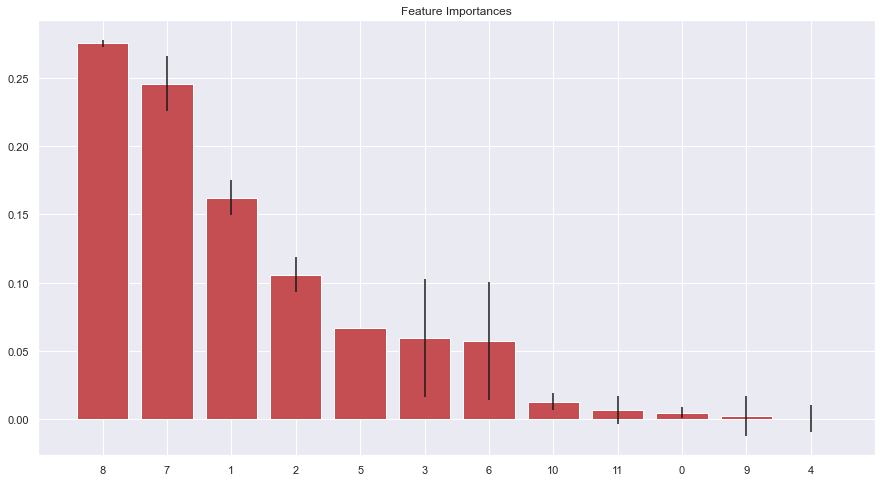

In [39]:
importances = forest.feature_importances_
std = np.std( [ tree.feature_importances_ for tree in forest.estimators_ ], axis=0 )
indices = np.argsort(importances)[::-1]

# print the feature ranking  
print('Feature Ranking: ')
df = pd.DataFrame()
for i, j in zip(x_train_n,forest.feature_importances_):
    aux = pd.DataFrame( {'feature': i, 'importance': j}, index=[0] )
    df= pd.concat( [df, aux], axis=0 )
print( df.sort_values( 'importance', ascending = False ) )

# plot the impurity-based feature importances of the forest 

plt.title('Feature Importances')
plt.bar(range(x_train_n.shape[1]),importances[indices], color ='r', yerr=std, align='center')
plt.xticks(range(x_train_n.shape[1]),indices)
plt.xlim([-1, x_train_n.shape[1]])
plt.show()

In [41]:
cols_selected = ['vintage', 'annual_premium', 'age', 'vehicle_damage', 'policy_sales_channel', 'previously_insured']

x_train = df5[cols_selected]
x_val = x_validation[cols_selected]
y_val = y_validation.copy()

## 7.1 KNN MODEL

In [42]:
# model definition
knn_model = nh.KNeighborsClassifier(n_neighbors=7)

# model training
knn_model.fit(x_train, y_train)

# model prediction - Poder de GENEREALIZAÇÃO
yhat_knn = knn_model.predict_proba( x_val )

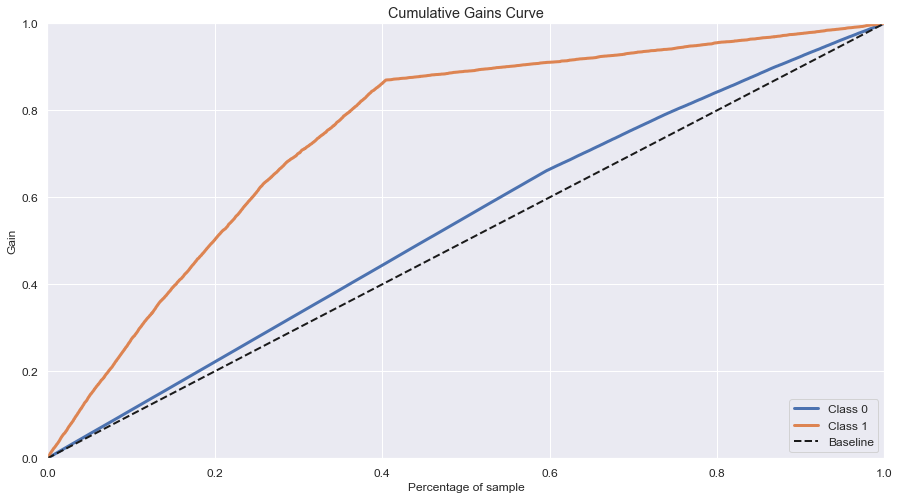

In [43]:
skplt.metrics.plot_cumulative_gain( y_val, yhat_knn);

<AxesSubplot:title={'center':'Cumulative Gains Curve'}, xlabel='Percentage of sample', ylabel='Gain'>

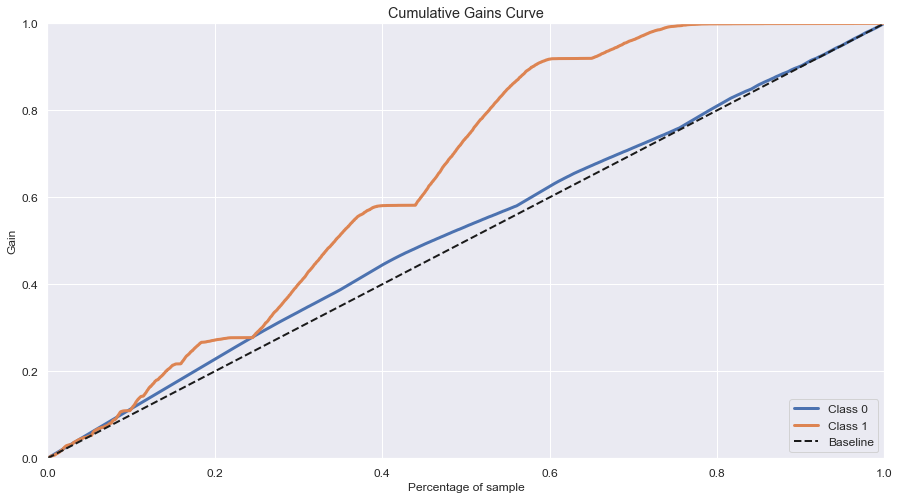

In [44]:
#model definition 
lr_model = lm.LogisticRegression( random_state=42 )

#model training 
lr_model.fit( x_train, y_train )

#model Prediction

yhat_lr = lr_model.predict_proba(x_val)

# Accumulative Gain
skplt.metrics.plot_cumulative_gain(y_val, yhat_lr)


# Extra Trees 

In [45]:
# # model definition
# et = en.ExtraTreesClassifier(n_estimators=1000, n_jobs=-1, random_state=42)

# # model fit

# et.fit( x_train,y_train )

# # model model predict
# yhat_et = et.predict_proba( x_val )

In [46]:
# # model result plot
# skplt.metrics.plot_cumulative_gain(y_val, yhat_et)

# 8.0 Model performance

In [47]:

def precision_at_k(data, k=2000):
    #reset_index
    data = data.reset_index(drop=True)
    
    # create ranking
    data['ranking']  = data.index + 1
    
    data['precision_at_k'] = data['response'].cumsum() / data['ranking']
    
    return data.loc[k , 'precision_at_k']

def recall_at_k(data, k=2000):
    #reset_index
    data = data.reset_index(drop=True)
    
    # create ranking
    data['ranking']  = data.index + 1
    
    data['recall_at_k'] = data['response'].cumsum() / data['response'].sum()
    
    return data.loc[k , 'recall_at_k']

In [48]:
df8 = x_validation.copy()
df8['response'] = y_val.copy()

# propesity score
df8['score'] = yhat_knn[: , 1].tolist()

# sorting clients by propensity scoce
df8 = df8.sort_values('score', ascending = False)

# compute precision at k
precision_at_50 = precision_at_k(df8 , k =40000)
print(f'Precision at k: {precision_at_50}')

# compute recall at k
recall_at_50 = recall_at_k(df8 , k =40000)
print(f'Recall at k: {recall_at_50}')


Precision at k: 0.2095697607559811
Recall at k: 0.8978258541287352


In [68]:
pickle.dump(lr_model, open( 'C:/Users/vande/repos/cross_sell/src/models/model_linear_regression.pkl','wb' ) )

In [72]:
# Class Creation

class HealthInsurance:
    def __init__( self ):
        self.home_path = 'C:/Users/vande/repos/cross_sell/'
        self.annual_premium_scaler = pickle.load( open( self.home_path + 'src/features/annual_premium_scaler.pkl' ) )
        self.age_scaler = pickle.load( open( self.home_path + 'src/features/age_scaler.pkl' ) )
        self.vintage_scaler = pickle.load( open( self.home_path + 'src/features/vintage_scaler.pkl' ) )
        self.target_encode_gender_scaler = pickle.load( open( self.home_path + 'src/features/target_encode_gender_scaler.pkl' ) )
        self.target_encode_region_code_scaler = pickle.load( open( self.home_path + 'src/features/target_encode_region_code_scaler.pkl' ) )
        self.fe_policy_sales_channel_scaler = pickle.load( open( self.home_path + 'src/features/fe_policy_sales_channel_scaler.pkl' ) ) 
        
    def data_engineering (self, df2 ):
        #vehicle age

        df2['vehicle_age'] = df2['vehicle_age'].apply( lambda x: 'below_1_year' if x ==  '< 1 Year' else 'between_1_2_year' if x == '1-2 Year' else 'above_2_years' )

        #vehicle damage
        df2['vehicle_damage'] = df2['vehicle_damage'].apply( lambda x: 1 if x ==  'Yes' else 0 )
            
        return df2
    
    def data_preparation( self, df5 ):
        # annual_premium - StandarScaler
        df5['annual_premium'] = self.annual_premium_scaler.transform(df5[['annual_premium']].values)

        # 'age'
        df5['age'] = self.age_scaler.transform(df5[['age']].values)

        # vintage
        df5['vintage'] = self.vintage_scaler.transform(df5[['vintage']].values)

        # gender - One Hot Encoding / Target Encoding
        df5.loc[: , 'gender'] = df5['gender'].map( self.target_encode_gender_scaler )

        # region_code  - Frequncy Encoding / Target Encoding / Weighted Target Encoding - #- Não aplica-se One Hot Encoding quando se tem mais de 6 nives (valores unicos)
        df5.loc[: , 'region_code'] = df5['region_code'].map( self.target_encode_region_code.scaler )

        # vehicle_age - One Hot Encoding / Order Encoding / Frequency Encoding
        df5 = pd.get_dummies( df5, prefix = 'vehicle_age', columns=['vehicle_age'] ) 

        # policy_sales_channel Target Encoding / Frequency Encoding
        df5.loc[: , 'policy_sales_channel'] = df5['policy_sales_channel'].map( self.fe_policy_sales_channel_scaler )
        
        #selected features
        cols_selected = ['vintage', 'annual_premium', 'age', 'vehicle_damage', 'policy_sales_channel', 'previously_insured']

        
        return df5[cols_selected]
        
    def get_prediction( self, model, original_data, test_data ):
        
        # get prediction for requested data
        pred = model.predict_proba( test_data )
        
        # adding into the original data
        original_data['score'] = pred
        
        #converting to json before sending back to requestor
        return original_data.to_json( orient= 'records', date_format='iso' )
        
        

# API Handler

In [90]:
import pickle 
import pandas as pd
from health_insurance_app.HealthInsurance import HealthInsurance
from flask import Flask, request, Response

#loading model 
path = 'C:/Users/vande/repos/cross_sell/'
model = pickle.load( open( path + 'src/models/model_linear_regression.pkl', 'rb' ) )

app = Flask(__name__)

@app.route( '/healthinsurance/predict', methods=['POST'] )
def health_insurance_predict():
    test_json = request.get_json()
    
    if test_json: #if there is data
        if isinstance(test_json, dict):
            test_raw = pd.DataFrame( test_json, index[0] )
        else: # if there is more than 1 line use this way to convert 
            test_raw = pd.DataFrame( test_json, columns=test_json[0].keys() )
        
        # instantiate rossmann class 
        pipeline = HealthInsurance()

        # feature engineering
        df1 = pipeline.data_engineering( data_raw )

        # data preparation
        df2 = pipeline.data_preparation( df1 )

        # prediction
        response = pipeline.get_prediction( df2 )

        return response

    else:
        return Response( '{}', status=200, mimetype='application/json' )

if __name__ == '__main__':
    app.run('0.0.0.0', debug=True)
    
        
    
    

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://192.168.100.78:5000 (Press CTRL+C to quit)
 * Restarting with stat


SystemExit: 1

In [80]:
pwd

'C:\\Users\\vande\\repos\\cross_sell'

In [100]:
# loading test dataset
import requests
df_test = x_validation

In [101]:
# getting 10 item for testing
df_test = df_test.sample(10)

In [102]:
# convert test dataset to json
data=json.dumps( df_test.to_dict( orient='records' ) )

In [103]:
data

'[{"id": 341275, "gender": "Female", "age": 23, "region_code": 50.0, "policy_sales_channel": 152.0, "driving_license": 1, "vehicle_age": "below_1_year", "vehicle_damage": 0, "previously_insured": 1, "annual_premium": 31895.0, "vintage": 290}, {"id": 118227, "gender": "Female", "age": 36, "region_code": 13.0, "policy_sales_channel": 26.0, "driving_license": 1, "vehicle_age": "between_1_2_year", "vehicle_damage": 1, "previously_insured": 0, "annual_premium": 26055.0, "vintage": 14}, {"id": 348137, "gender": "Female", "age": 77, "region_code": 6.0, "policy_sales_channel": 124.0, "driving_license": 1, "vehicle_age": "between_1_2_year", "vehicle_damage": 0, "previously_insured": 1, "annual_premium": 33546.0, "vintage": 74}, {"id": 251109, "gender": "Female", "age": 41, "region_code": 47.0, "policy_sales_channel": 124.0, "driving_license": 1, "vehicle_age": "between_1_2_year", "vehicle_damage": 1, "previously_insured": 0, "annual_premium": 26076.0, "vintage": 245}, {"id": 64725, "gender": "F

In [ ]:
# API CALL 

url = 'http://192.168.100.78:5000/predict'
header = { 'Content-type':'application/json'}

r = requests.post(url, data=data, headers=header)
print(f'Status Code {r.status_code}')

In [ ]:
df1 = pd.Dataframe(r.json(), columns=r.json()[0].keys())
df1.sort_values( 'score', ascending=False ).head()